[3:24 PM, 1/11/2020] Dorai ML: 

    Here is how I see the progression:
    1. Try it with a few random sites - government, business, educational institutions and non-profits.
    2. Try with at least 3 of each.
    3. We will see some patterns
    4. Then let us hone in one one type and start going on deeper.
    5. We may end up subcategorizing them even further.
    
We can do 3-5 for a couple of milestones. My goal in giving you this project is to learn from your explorations. So your learnlog and the python notebooks will be the most useful.
There is so much information that can be gleaned by clustering the link titles using `K+ means` from your explorations. So your learnlog and the python notebooks will be the most useful.

We will discover lots of synsets. stop word removal and noise word removal. 
But that happens automatically when you use s tf/idf vectorizer. Read up on tf/idf
    
    1. Analyze 1000 random sites.
    2. Gather all the titles from links
    3. Cluster them using k+means using tf/idf vectorizer
    4. Use LDA for topic analysis

    And let us look at it. How do you get 1000 sites? Use 
http://searchassistant.infoassistants.com/ 
    
    It will give you a downloadable CSV file of all the site links.

### Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
from nltk.corpus import words
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [29]:
import time

In [43]:
from nltk import pos_tag
from nltk import RegexpParser
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

### Machine learning search - `urls` and `titles`

In [6]:
url_titles = pd.read_excel("titles_urls_ml.xlsx", names = ['Title', 'Url'])
url_titles.head()

,Title,Url
0,Learn AI & Machine Learning | By UT Austin & G...,https://www.greatlearning.in/great-learning-on...
1,Artificial Intelligence Course | 100% Assured ...,https://imarticus.org/post-graduate-program-in...
2,Case Study and Project,https://imarticus.org/machine-learning-prodegr...
3,Training Methodology,https://imarticus.org/machine-learning-prodegr...
4,Get Trained From Experts,https://imarticus.org/machine-learning-prodegr...


In [7]:
def remove_unwanted(x):
    if x[:4] != 'http':
        x = None
    return x

In [8]:
url_titles['Url'] = url_titles['Url'].apply(remove_unwanted)

In [9]:
url_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 2 columns):
Title    4318 non-null object
Url      3966 non-null object
dtypes: object(2)
memory usage: 67.5+ KB


In [10]:
url_titles.dropna(axis=0, inplace = True) 

In [11]:
url_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3966 entries, 0 to 4317
Data columns (total 2 columns):
Title    3966 non-null object
Url      3966 non-null object
dtypes: object(2)
memory usage: 93.0+ KB


In [12]:
doc = str()
for x in url_titles['Title']:
    doc = doc + " "+ x

In [13]:
print(doc)

 Learn AI & Machine Learning | By UT Austin & Great Lakes‎ Artificial Intelligence Course | 100% Assured Placement‎ Case Study and Project Training Methodology Get Trained From Experts Admissions Amazon Machine Learning | Broad Set Of Free ML Services‎ What is Machine Learning? A definition - Expert System Machine Learning | Coursera Reviews Instructors Machine learning - Wikipedia Machine Learning (journal) Timeline of machine learning Computer vision Torch Machine Learning - GeeksforGeeks Difference between Machine ... ML | What is Machine Learning Applications Machine Learning | An Introduction - Towards Data Science Machine Learning – Towards Data Science What is machine learning (ML)? - Definition from WhatIs.com What is machine learning? - Brookings Institution What is Machine Learning? Understanding Machine Learning ... 14 Different Types of Learning in Machine Learning What is Machine Learning? | Emerj What is Machine Learning? | Types of Machine Learning ... Deep learning vs. 

### TF-IDF Vectorizer

https://github.com/krishnaik06/Natural-Language-Processing/blob/master/TFIDF.py

In [14]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
sentences = nltk.sent_tokenize(doc)
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
#     d = enchant.Dict("en_US")
    
# Creating the TF-IDF model
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [15]:
"learn ai machine learning ut austin great lake artificial intelligence course assured placement".split() in words.words()

False

In [16]:
print(corpus)

['learn ai machine learning ut austin great lake artificial intelligence course assured placement case study project training methodology get trained expert admission amazon machine learning broad set free ml service machine learning', 'definition expert system machine learning coursera review instructor machine learning wikipedia machine learning journal timeline machine learning computer vision torch machine learning geeksforgeeks difference machine ml machine learning application machine learning introduction towards data science machine learning towards data science machine learning ml', 'definition whatis com machine learning', 'brookings institution machine learning', 'understanding machine learning different type learning machine learning machine learning', 'emerj machine learning', 'type machine learning', 'deep learning v machine learning understand machine learning', 'work technique machine learning udacity machine learning overview sciencedirect topic machine learning mit ne

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_df = pd.DataFrame(X)
np.savetxt('Tf-Idf_values', X_df.values, fmt='%f')
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3422,3423,3424,3425,3426,3427,3428,3429,3430,3431
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(*cv.get_feature_names(), sep = '\n')

aa
aalto
aapatel
ab
abhijit
abhishek
abound
absolute
abu
ac
academia
academic
academy
acca
accelerate
accelerates
accelerating
acceleration
accelerator
accenture
access
acclaim
accompanying
accord
according
accounting
accuracy
accurate
accurately
achronus
acid
acl
acm
acml
acmlc
acquires
across
action
actionable
active
activestate
activity
actual
actually
ad
adalab
adapting
adaptive
add
added
addepto
adding
additive
addressing
adext
adherence
admin
admission
adobe
adopting
advance
advanced
advantage
adventure
adversarial
adverse
advertising
advice
advisor
advocate
adweek
aetna
affect
aframe
age
agent
ageron
aggregate
aggregation
agnostic
agoda
agricultural
agriculture
aha
ahead
ahmet
ai
aiartists
aid
aim
aiops
al
alammar
alchemy
alcide
alerting
alex
alexa
algorithm
algorithmia
algorithmic
alibaba
aligning
alignment
alina
alison
allege
allen
allocation
allow
almond
along
alpha
alphago
alternative
altexsoft
alto
alum
always
alzheimer
amazing
amazon
american
amino
aml
amlsp
among
amt
anal

grid
gridgain
gridworld
grobid
grokking
ground
grounding
group
groupby
grow
growing
growth
gruppen
gsoc
guarantee
guesswork
guest
gui
guide
guided
guideline
guiding
guru
gym
habitability
hack
hackaday
hacked
hacker
hackerearth
hackernoon
hadoop
half
halo
hamelsmu
hamiltonians
han
hana
hand
handbook
handle
handling
handson
handwritten
happens
hardness
hardware
harmonic
harness
harnessing
harrison
harshit
harvard
hat
hawley
haystream
hazyresearch
hbo
head
headache
headway
health
healthcare
heartbeat
hecc
hedge
helix
help
helped
helpful
helping
hero
heterogeneous
hidden
hierarchical
high
higher
highest
highly
hilary
hill
himss
hire
hiring
histopathological
hitachi
hold
hole
holstep
home
homemade
homepage
homomorphic
hone
hope
hopkins
horowitz
hospital
host
hosting
hot
hotel
hotspot
hottest
hour
house
housing
hpcc
hpe
hr
htap
http
hub
hugo
human
humanity
humble
hundred
hunger
hunt
hurl
hybrid
hype
hypepotamus
hypercholesterolemia
hyperopt
hyperparameter
hyperparameters
hyperspy
hypoglycemi

will
wilson
wimlds
win
window
winner
winning
wired
wireheading
wireless
wise
within
without
wizard
wolfram
woman
wont
word
wordstream
work
workable
workbench
workday
workflow
working
workshop
world
worth
wrangling
wrong
wspml
wvu
www
xgboost
xkcd
yahoo
yale
yandex
yanjun
yannis
year
yearning
yellowbrick
yield
yingguo
york
yorko
youtube
yuan
zab
zairza
zare
zdnet
zero
zetta
zisserman
zoominfo
zynq


In [19]:
# lst = list()
# for sentence in corpus:
#     for x in sentence.split():
#         if x in words.words():
#             lst += [x]
#             print(x)

In [20]:
f= open("feature_names.txt","w+")
for x in cv.get_feature_names():
    f.write(x+"\n")

## k++ means and pca plot
https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Time Elapsed =  55.57014608383179


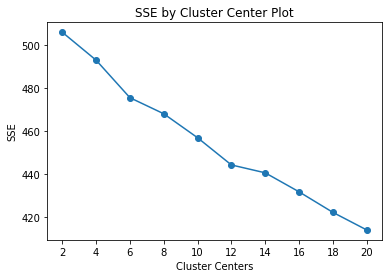

In [30]:
def find_optimal_clusters(data, max_k):
    start = time.time()
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    end = time.time()
    print("Time Elapsed = ", end-start)

    
find_optimal_clusters(X, 20)

In [31]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(X)

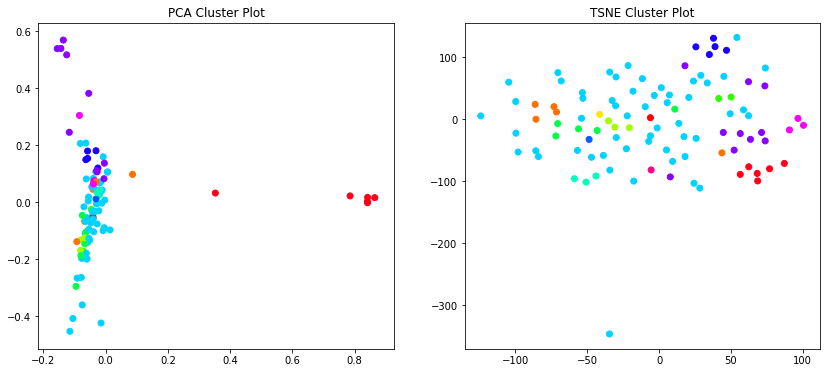

In [32]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=100 , replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=100).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(X, clusters)

In [33]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(X, clusters, cv.get_feature_names(), 10)


Cluster 0
spark,tackling,climate,big,mathematica,data,dataset,learning,machine,datasets

Cluster 1
sa,processing,science,pre,collection,preprocessing,learning,machine,big,data

Cluster 2
oracle,ai,project,best,cool,ml,machinelearning,machine,learning,blog

Cluster 3
science,updated,ai,certified,certificate,online,certification,machine,learning,course

Cluster 4
learn,ai,business,top,programming,language,best,learning,machine,company

Cluster 5
python,ai,opportunity,data,difference,notebook,machine,jupyter,learning,deep

Cluster 6
creating,selecting,ml,model,algorithm,learning,logistic,machine,linear,regression

Cluster 7
tool,algorithm,possibility,scope,data,ai,intelligence,artificial,learning,machine

Cluster 8
intelligence,supporting,versus,happens,artificial,deep,machine,learning,network,neural

Cluster 9
using,engine,filtering,building,based,learning,machine,recommender,recommendation,system

Cluster 10
mathematics,analysis,machine,principal,component,ica,pca,unsupervised,learning

### POS tagging

In [54]:
tokens_tag = pos_tag(cv.get_feature_names())
print("After Token:",tokens_tag)
patterns= """mychunk:{<NN.?>*<VBD.?>*<VBG.?>*<VB.?>?}"""
chunker = RegexpParser(patterns)
print("After Regex:",chunker)
output = chunker.parse(tokens_tag)
print("After Chunking",output)

After Token: [('aa', 'NN'), ('aalto', 'NN'), ('aapatel', 'NN'), ('ab', 'NN'), ('abhijit', 'NN'), ('abhishek', 'NN'), ('abound', 'IN'), ('absolute', 'JJ'), ('abu', 'NN'), ('ac', 'NN'), ('academia', 'NN'), ('academic', 'JJ'), ('academy', 'NN'), ('acca', 'NN'), ('accelerate', 'NN'), ('accelerates', 'VBZ'), ('accelerating', 'VBG'), ('acceleration', 'NN'), ('accelerator', 'NN'), ('accenture', 'NN'), ('access', 'NN'), ('acclaim', 'NN'), ('accompanying', 'VBG'), ('accord', 'NN'), ('according', 'VBG'), ('accounting', 'VBG'), ('accuracy', 'NN'), ('accurate', 'VBP'), ('accurately', 'RB'), ('achronus', 'JJ'), ('acid', 'NN'), ('acl', 'NN'), ('acm', 'NN'), ('acml', 'NN'), ('acmlc', 'NN'), ('acquires', 'VBZ'), ('across', 'IN'), ('action', 'NN'), ('actionable', 'JJ'), ('active', 'JJ'), ('activestate', 'NN'), ('activity', 'NN'), ('actual', 'JJ'), ('actually', 'RB'), ('ad', 'NN'), ('adalab', 'NN'), ('adapting', 'VBG'), ('adaptive', 'JJ'), ('add', 'NN'), ('added', 'VBD'), ('addepto', 'JJ'), ('adding', '

In [66]:
for subtree in output.subtrees():
    lsy = [x for x in subtree]
    print(lsy[0][0])
    # print(subtree.label())

('aa', 'NN')
aa
abu
academy
accelerating
acceleration
accord
accuracy
acid
action
activestate
ad
add
adding
addressing
adherence
adopting
advance
adventure
advertising
aetna
agriculture
ahmet
aiartists
aiops
alchemy
alerting
alexa
alibaba
alina
allen
allocation
almond
alto
amazing
amino
amlsp
analyse
analysis
analyticbridge
andreessen
android
angiosperm
annotated
annotation
announcing
anomaly
anova
anticipate
apache
appdynamics
apple
applies
applying
appraisal
apps
aps
architecting
arcitura
arpa
art
article
artist
asia
ask
ass
asset
association
astronomy
atari
attack
attend
attention
audit
augmentation
augustus
auto
automate
automates
automating
automation
autonomy
availability
award
awesomedata
azure
bach
backpropagation
band
bank
bartmachine
basement
basicai
bayes
bbc
becomes
beginner
behaviour
belief
benefit
beta
beutel
bi
bigdata
bigml
binder
biology
biopsy
bit
blackberry
blobfromimage
blog
board
bonus
boston
box
brand
bringing
broaden
brookings
brownfield
browser
bump
burn
calcula

In [86]:
lst = []
for subtree in output.subtrees():
#     print(subtree)
    for x in subtree:
        for y in x:
#             print(type(type(y)))
            if isinstance(y, tuple):
                lst += [y]
                print(y)
    #print([x[0][0] for x in subtree])

('aa', 'NN')
('aalto', 'NN')
('aapatel', 'NN')
('ab', 'NN')
('abhijit', 'NN')
('abhishek', 'NN')
('abu', 'NN')
('ac', 'NN')
('academia', 'NN')
('academy', 'NN')
('acca', 'NN')
('accelerate', 'NN')
('accelerates', 'VBZ')
('accelerating', 'VBG')
('acceleration', 'NN')
('accelerator', 'NN')
('accenture', 'NN')
('access', 'NN')
('acclaim', 'NN')
('accompanying', 'VBG')
('accord', 'NN')
('according', 'VBG')
('accounting', 'VBG')
('accuracy', 'NN')
('accurate', 'VBP')
('acid', 'NN')
('acl', 'NN')
('acm', 'NN')
('acml', 'NN')
('acmlc', 'NN')
('acquires', 'VBZ')
('action', 'NN')
('activestate', 'NN')
('activity', 'NN')
('ad', 'NN')
('adalab', 'NN')
('adapting', 'VBG')
('add', 'NN')
('added', 'VBD')
('adding', 'VBG')
('addressing', 'VBG')
('adherence', 'NN')
('admin', 'NN')
('admission', 'NN')
('adopting', 'VBG')
('advance', 'NN')
('advanced', 'VBD')
('adventure', 'NN')
('advertising', 'NN')
('advice', 'NN')
('advisor', 'NN')
('advocate', 'NN')
('aetna', 'NN')
('affect', 'NN')
('aframe', 'NN')


('linked', 'VBD')
('linux', 'NN')
('linz', 'NN')
('lionbridge', 'NN')
('list', 'NN')
('listing', 'VBG')
('literature', 'NN')
('ller', 'NN')
('llsourcell', 'NN')
('load', 'NN')
('loading', 'VBG')
('localization', 'NN')
('lod', 'NN')
('log', 'NN')
('logisticregression', 'NN')
('logistics', 'NNS')
('london', 'VBP')
('look', 'NN')
('looking', 'VBG')
('los', 'NN')
('loss', 'NN')
('lost', 'VBD')
('lstm', 'NN')
('luajit', 'NN')
('luddy', 'NN')
('lunar', 'NN')
('lung', 'NN')
('lva', 'NN')
('ly', 'NN')
('lyft', 'NN')
('mac', 'NN')
('machine', 'NN')
('machinelearning', 'VBG')
('machinelearningmindset', 'NN')
('macroscopes', 'NNS')
('made', 'VBN')
('madison', 'NN')
('madlib', 'NN')
('mads', 'NNS')
('maestro', 'VBP')
('magazine', 'NN')
('magenta', 'NN')
('magnimind', 'NN')
('mainframe', 'NN')
('majorization', 'NN')
('make', 'VBP')
('making', 'VBG')
('malevolent', 'NN')
('mallet', 'NN')
('malware', 'NN')
('manage', 'NN')
('management', 'NN')
('manager', 'NN')
('managing', 'VBG')
('manifold', 'NN')


('towards', 'NNS')
('tpot', 'NN')
('tpu', 'NN')
('track', 'NN')
('tracking', 'VBG')
('trading', 'VBG')
('traffic', 'NN')
('trail', 'NN')
('train', 'NN')
('trained', 'VBD')
('training', 'NN')
('transfer', 'NN')
('transformation', 'NN')
('transforming', 'VBG')
('transition', 'NN')
('translate', 'NN')
('translation', 'NN')
('transparency', 'NN')
('transport', 'NN')
('transportation', 'NN')
('treasure', 'NN')
('tree', 'NN')
('tremor', 'NN')
('trend', 'NN')
('trending', 'VBG')
('trial', 'NN')
('trick', 'NN')
('tried', 'VBD')
('troubling', 'VBG')
('trump', 'NN')
('trusted', 'VBD')
('try', 'NN')
('tryolabs', 'NNS')
('tt', 'VBP')
('tumor', 'NN')
('tuna', 'NN')
('tunability', 'NN')
('tuning', 'VBG')
('turk', 'NN')
('turner', 'NN')
('turning', 'VBG')
('tutorialspoint', 'NN')
('tweet', 'NN')
('twitter', 'NN')
('type', 'NN')
('uci', 'NN')
('udacity', 'NN')
('udemy', 'NN')
('un', 'NNS')
('uncertainty', 'NN')
('unconference', 'NN')
('understand', 'NN')
('understanding', 'NN')
('unit', 'NN')
('unity'

In [87]:
with open('Parts_of_speech_filtering.txt', 'w') as fp:
    fp.write('\n'.join('%s %s' % x for x in lst))

In [25]:
# xs = [1,5,3,4]
# print(xs[::-1], xs[:])
# print(xs[::2])

In [26]:
#print(corpus,X)

In [27]:
# for feature, 

In [28]:
# f= open("term_frequency.txt","w+")
# for x in cv.get_feature_names():
#     f.write(x+"\n")